<a href="https://colab.research.google.com/github/samirsharma-github/aiml/blob/main/Copy_of_ML_in_Astronomy_day1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Astronomical bodies Classification | Dataset Preprocessing


A joint workshop by AIMLC and PAC

---

Before you get on with classifying heavenly bodies thousands of light years across, this session will take you through the basics of how these are represented in less than 20 numbers.

You will learn the basics of data preprocessing, including (but not at all limited by) visualisation, cleaning and feature selection.


### Data

Lets look at some images of these cool astronomical bodies

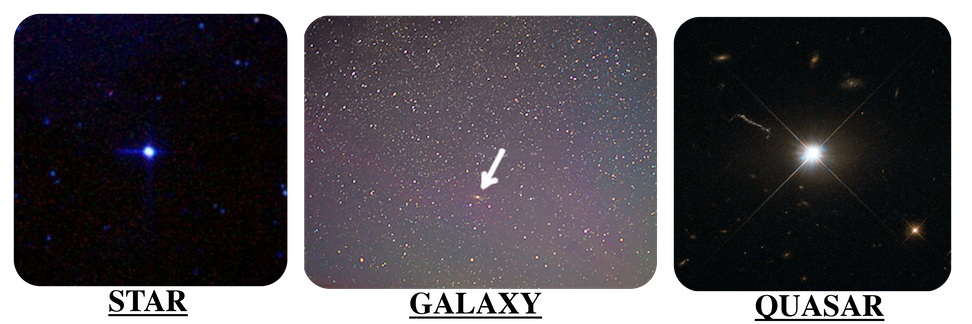

These images look very similar to each other and may not be sufficient to classify them.

We will instead use the Sloan Digital Sky Survey dataset [(info)](https://www.sdss.org). Including multi-color and spectral data makes the classification easier.

### Importing Libraries

These nifty little things make your job a lot easier. You can build upon the hard work of highly skilled data scientists making them.

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import sklearn
import seaborn as sns

### Loading data

Adding the dataset file to the colab file system.

In [ ]:
!gdown https://drive.google.com/uc?id=1u0ycW4WPV3rArQL65Q7YZUNacJVy7Tru

Loading the dataset into a pandas dataframe.

The dataframe allows you to easily process the data, with specialised functions performing some of the most common tasks involved.

In [ ]:
data = pd.read_csv("SDSS.csv")

Lets take a quick look at what the dataset stores, what these stored values mean and how they can represent an extremely luminous active galactic nucleus (quasar)

In [ ]:
data.head(5)

<!-- ###### The table results from a query which joins two tables: -->
<!-- "PhotoObj" which contains photometric data
"SpecObj" which contains spectral data
16 variables (double) and 1 additional variable (char) 'class'
A class object can be predicted from the other 16 variables -->

Descriptions of some variables:

<table>
  <tr>
    <th>Field</th>
    <th>Description</th>
    <th>In laymen terms</th>
  </tr>
  <tr>
    <td>class </td>
    <td>object class </td>
    <td>(galaxy, star or quasar object)</td>
  </tr>
  <tr>
    <td>objid</td>
    <td>Object Identifier</td>
    <td>Roll numbers of objects</td>
  </tr>
  <tr>
    <td>ra</td>
    <td>J2000 Right Ascension (r-band)</td>
    <td>To specify location wrt earth</td>
  </tr>
  <tr>
    <td>dec </td>
    <td>J2000 Declination (r-band)</td>
    <td>To specify location wrt earth</td>
  </tr>
  <tr>
    <td>u, g, r, i, z </td>
    <td>Better of deV/Exp (u, g, r, i, z-bands)</td>
    <td>Related to the spectrum of the body</td>
  </tr>
  <tr>
    <td>run </td>
    <td>Run Number</td>
    <td>When they ran observations on this</td>
  </tr>
  <tr>
    <td>rreun </td>
    <td>Rerun Number</td>
    <td>When they reran observations on this</td>
  </tr>
  <tr>
    <td>field </td>
    <td>Field number</td>
    <td>-</td>
  </tr>
  <tr>
    <td>specobjid </td>
    <td>Object Identifier</td>
    <td>-</td>
  </tr>
  
</table>

You can read more about the dataset [here](https://www.kaggle.com/muhakabartay/sloan-digital-sky-survey-dr16)
<!-- 
objid = Object Identifier

ra = J2000 Right Ascension (r-band)

dec = J2000 Declination (r-band)

u = better of deV/Exp magnitude fit (u-band)

g = better of deV/Exp magnitude fit (g-band)

r = better of deV/Exp magnitude fit (r-band)

i = better of deV/Exp magnitude fit (i-band)

z = better of deV/Exp magnitude fit (z-band)

run = Run Number

rerun = Rerun Number

camcol = Camera column

field = Field number

specobjid = Object Identifier

class = object class (galaxy, star or quasar object)
redshift = Final Redshift

plate = plate number

mjd = MJD of observation

fiberid = fiberID -->

Are all of these sufficient? Are they necessary?

### Basic Analysis

In [ ]:
data.shape

In [ ]:
data.nunique()

In [ ]:
data.info()

In [ ]:
data.describe()

### Identifying Classes

How many of each are there?

In [ ]:
data['class'].value_counts()

The number of instances of each class is in the ratio 5:4:1. Does this matter? How can this change anything about our model?

In [ ]:
sns.countplot(x='class', data=data, palette="brg")
plt.show()

## Understanding Features

Currently there are 18 features (columns in the data): 

1. objid
2. ra 
3. dec 
4. u 
5. g 
6. r 
7. i 
8. z 
9. run 
10. rerun 
11. camcol
12. field 
13. specobjid
14. class 
15. redshift 
16. plate 
17. mjd 
18. fiberid

Are all of these usefull? If not, why keep them? Lets drop features!

### Dropping Unnecessary Features

These are the features that we can easily tell are not usefull.

In [ ]:
data.drop(['run', 'rerun'], axis = 1, inplace = True)
data.head(3)

In [ ]:
data.drop(['objid', 'specobjid','fiberid'], axis = 1, inplace = True)
data.head(3)

In [ ]:
data.drop(['camcol','field'], axis = 1, inplace = True)
data.head(3)

### Visualizations

First lets see a visualisation for for how the remaining features are related to each other.

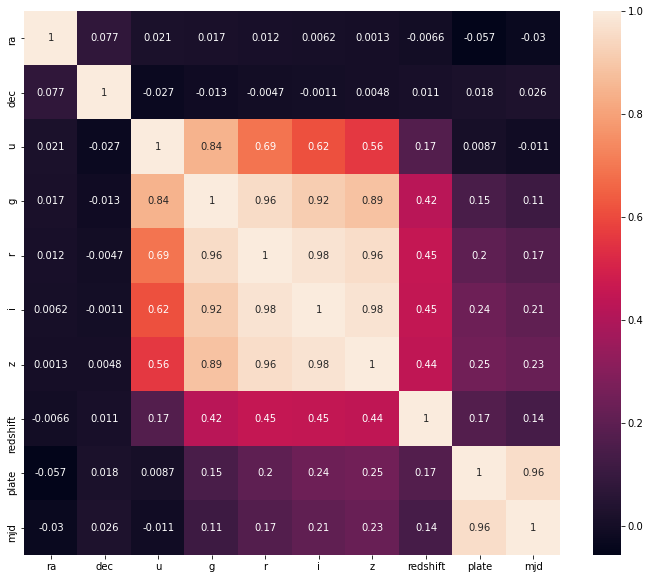

In [ ]:
corr = data.corr()
plt.figure(figsize = (12,10))
sns.heatmap(corr, annot = True)

Now, lets try visualisations of the features individually to get a better grasp of what they represent, and how they affect the class.

In [ ]:
sns.relplot( x= 'ra', y='dec', hue = 'class', data = data)

In [ ]:
sns.relplot( x= 'u', y='g', hue = 'class', data = data)

In [ ]:
sns.relplot( x= 'r', y='i', hue = 'class', data = data)

In [ ]:
sns.relplot( x= 'u', y='i', hue = 'class', data = data)

In [ ]:
sns.relplot( x= 'r', y='g', hue = 'class', data = data)

## Histograms

In [ ]:
data['redshift'].hist()

In [ ]:
data['plate'].hist()

In [ ]:
data['mjd'].hist()

## Label Encoding

The algorithm needs to know what you mean when you say 'star'

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['class'] = le.fit_transform(data['class'])
class_mapping = { a:i for i,a in enumerate(le.classes_)}
print(class_mapping)

In [ ]:
data

## Train-Val-Test Division

To understand how well you model is performing, you need to test it on unseen data (Yup, just like JEE). The dataset is split into 3 parts so that one part can be used for training, one for assessment and optimization, while the other  for final testing. Testing should not be done on the samples that were used for training, as this gives a false picture of the performance of the algorithm.

In [ ]:
y = data['class'].values
X = data.drop('class', axis = 1).values

In [ ]:
from sklearn.model_selection import train_test_split
X1, X_test, y1, y_test = train_test_split(X, y , test_size = 0.2, stratify=y, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X1, y1, test_size = 0.25, random_state=2)


In [ ]:
print("Train Size :", len(y_train))
print("Validation Size :", len(y_val))
print("Test Size :", len(y_test))

In [ ]:
feature_list = list(data.drop('class', axis=1).columns)

In [ ]:
print(feature_list)